In [87]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister, Parameter



# Creating registers
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')

# Creates the quantum circuit
teleport = QuantumCircuit(q, c, name='teleport')


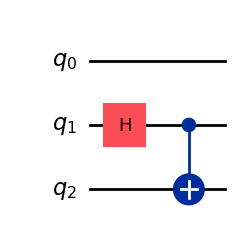

In [88]:
# Make the shared entangled state
bell = QuantumCircuit(q, name='Bell states')
bell.h(q[1])
bell.cx(q[1], q[2])
bell.draw('mpl')

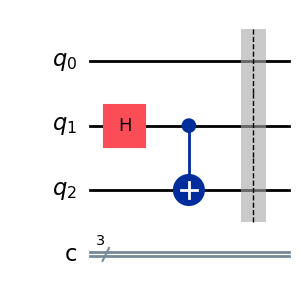

In [89]:

teleport1 = teleport.compose(bell, range(3), front=True)
teleport1.barrier(q)
teleport1.draw('mpl')


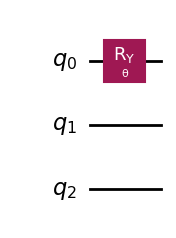

In [90]:
# Prepare Alice's qubit
alice = QuantumCircuit(q, name="Alice's qbit")
params = [Parameter('θ')]
alice.ry(params[0], 0)
alice.draw('mpl')

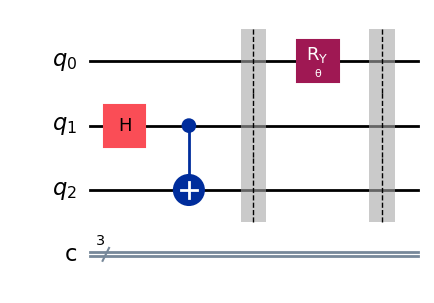

In [91]:
teleport2 = teleport1.compose(alice, range(3), front=False)
teleport2.barrier(q)
teleport2.draw('mpl')

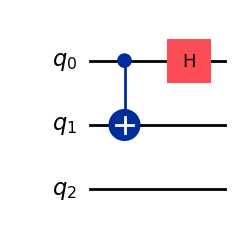

In [92]:
# Alice applies teleportation gates (or projects to Bell basis)
tel = QuantumCircuit(q, name="Teleportation gate")
tel.cx(q[0], q[1])
tel.h(q[0])
tel.draw('mpl')

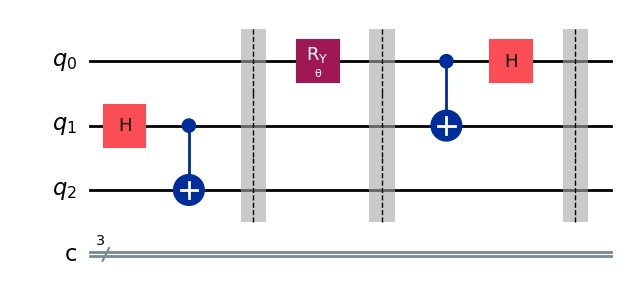

In [93]:
teleport3 = teleport2.compose(tel, range(3), front=False)
teleport3.barrier(q)
teleport3.draw('mpl')

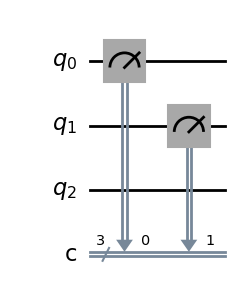

In [94]:
# Alice measures her qubits
meas = QuantumCircuit(q, c, name="Teleportation gate")
meas.measure(q[0], c[0])
meas.measure(q[1], c[1])
meas.draw('mpl')

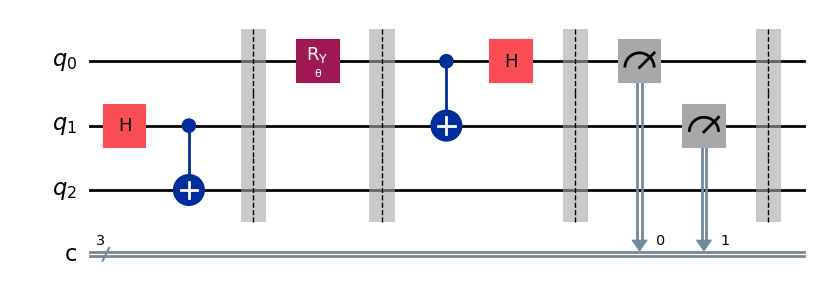

In [95]:
teleport4 = teleport3.compose(meas, range(3), front=False)
teleport4.barrier(q)
teleport4.draw('mpl')

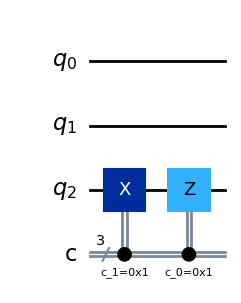

In [96]:
# Bob applies certain gates based on the outcome of Alice's measurements
bob = QuantumCircuit(q, c, name="Bob's transformations")
bob.x(q[2]).c_if(c[1], 1)
bob.z(q[2]).c_if(c[0], 1)
bob.draw('mpl')

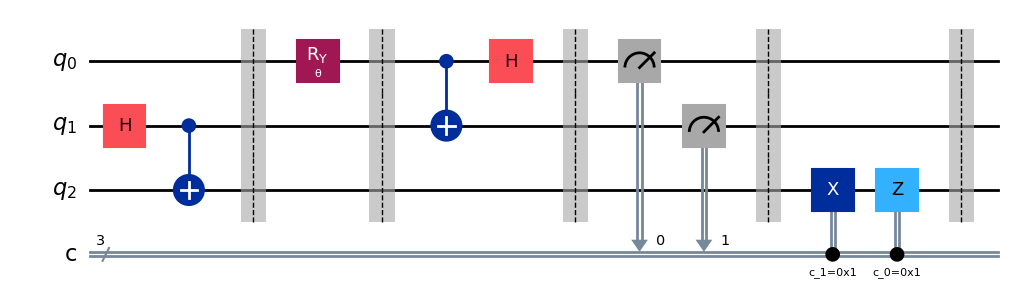

In [97]:
teleport5 = teleport4.compose(bob, range(3), front=False)
teleport5.barrier(q)
teleport5.draw('mpl')

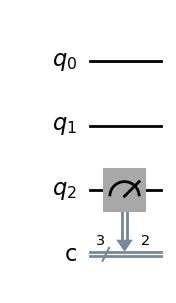

In [98]:
#measure Bob's qbit
meas_b = QuantumCircuit(q, c, name="Bob's measurement")
meas_b.measure(q[2],c[2])
meas_b.draw('mpl')

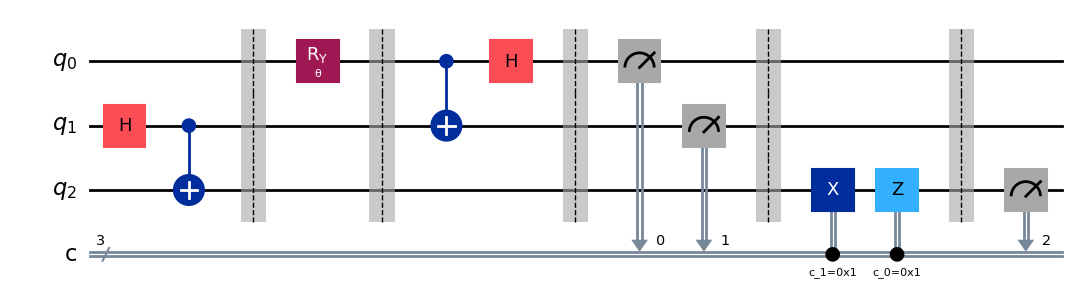

In [99]:
teleport = teleport5.compose(meas_b, range(3), front=False)
teleport.draw('mpl')

In [100]:
from qiskit.quantum_info import Statevector

In [101]:
state = Statevector.from_int(0, 2**3)
state = state.evolve(teleport1)
state.draw('latex')

<IPython.core.display.Latex object>

In [102]:
import math
bound_teleport2 = teleport2.assign_parameters({params[0]:math.pi*0})
state = Statevector.from_int(0, 2**3)
state = state.evolve(bound_teleport2)
state.draw('latex')

<IPython.core.display.Latex object>

In [103]:
state = Statevector.from_int(0, 2**3)
bound_teleport3 = teleport3.assign_parameters({params[0]:math.pi*0})
state = state.evolve(bound_teleport3)
state.draw('latex')

<IPython.core.display.Latex object>

In [104]:
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2
#from qiskit.providers.aer import QasmSimulator
#backend = QasmSimulator()
backend = GenericBackendV2(5)

bound_teleport = teleport.assign_parameters({params[0]:math.pi*0.8})
tel_compiled = transpile(bound_teleport, backend)
job_sim = backend.run(tel_compiled, shots=1024)

result_sim = job_sim.result()
counts = result_sim.get_counts(tel_compiled)
print(counts)

{'001': 31, '101': 218, '011': 29, '111': 219, '110': 243, '100': 231, '010': 25, '000': 28}


In [105]:
merged={'0':0, '1':0}
for l in counts:
    merged[l[0]] += counts[l]
merged

{'0': 113, '1': 911}

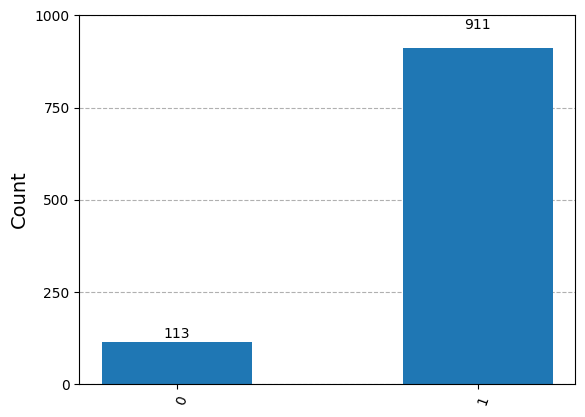

In [106]:
from qiskit.visualization import plot_histogram
plot_histogram(merged)